<a href="https://colab.research.google.com/github/Vanijonnalagadda/Python-Basics/blob/Training/Random_Forest_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns


In [15]:
#Import the dataset
Dataset = pd.read_csv('./Social_Network_Ads.csv')


In [16]:
#View Dataset
Dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [18]:
#Data Preprocessing to Handle missing values or data cleaning
Dataset.isna().sum()


,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [23]:
#Feature Matrix (X) = Independent variables (input)
#Dependent Variable Vector (y) = Target variable (output)
X = Dataset.iloc[:, 2:4].values
y = Dataset.iloc[:, -1].values

In [30]:
#split the data into training and testing sets before training a machine learning model. 0.2 mean 20% of the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [39]:
#Train the dataset into Random Forest Model, n_estimators = 10 means 10 decision trees,Entropy is a measure of disorder or randomness in a system
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [40]:
# Predictions
y_pred = classifier.predict(X_test)

<Axes: >

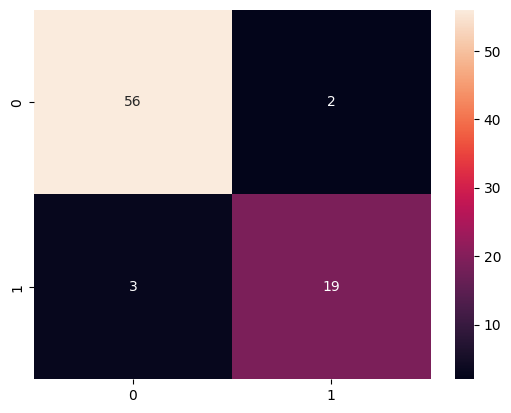

In [41]:
#Checking Model Accuracy Using Confusion Matrix and comparing actual labels (y_test) with predicted labels (y_pred).
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

TN = 50 → 50 correct "Not Fraud" predictions.
FP = 5 → 5 false alarms (wrongly predicted fraud).
FN = 3 → 3 fraud cases were missed.
TP = 42 → 42 fraud transactions correctly detected.

In [42]:
#model accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9375